<a href="https://colab.research.google.com/github/taigi0315/another_me_in_market/blob/main/Algorithmic_Trading_Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as data_reader
from datetime import datetime
plt.style.use('fivethirtyeight')

In [ ]:
# Load the data
start = datetime(2020, 1, 1)
end = datetime(2020, 12, 30)
ticker = 'AMZN'
df = data_reader.DataReader(ticker, 'yahoo', start, end)

In [ ]:
def OBV(df, span=20, price='Close', volume='Volume'):
  """ Calculate and add On Balance Volume(OBV) to the dataframe
  Arguments:
    df: dataframe
    span: time period in day that is used to calculate OBV_EMA
    price: name of price column
    volume: name of volume column
  """
  OBV = []
  OBV.append(0)
  
  for i in range(1, len(df[price])):
    if df[price][i] > df[price][i-1]:
      OBV.append(OBV[-1] + df[volume][i])
    elif df[price][i] < df[price][i-1]:
      OBV.append(OBV[-1] - df[volume][i])
    else:
      OBV.append(OBV[-1])
  # Update dataframe
  df['OBV'] = OBV
  # Calculate OBV exponential weighted OBV
  df['OBV_EMA_{}'.format(span)] = df['OBV'].ewm(span=span).mean()
  return df

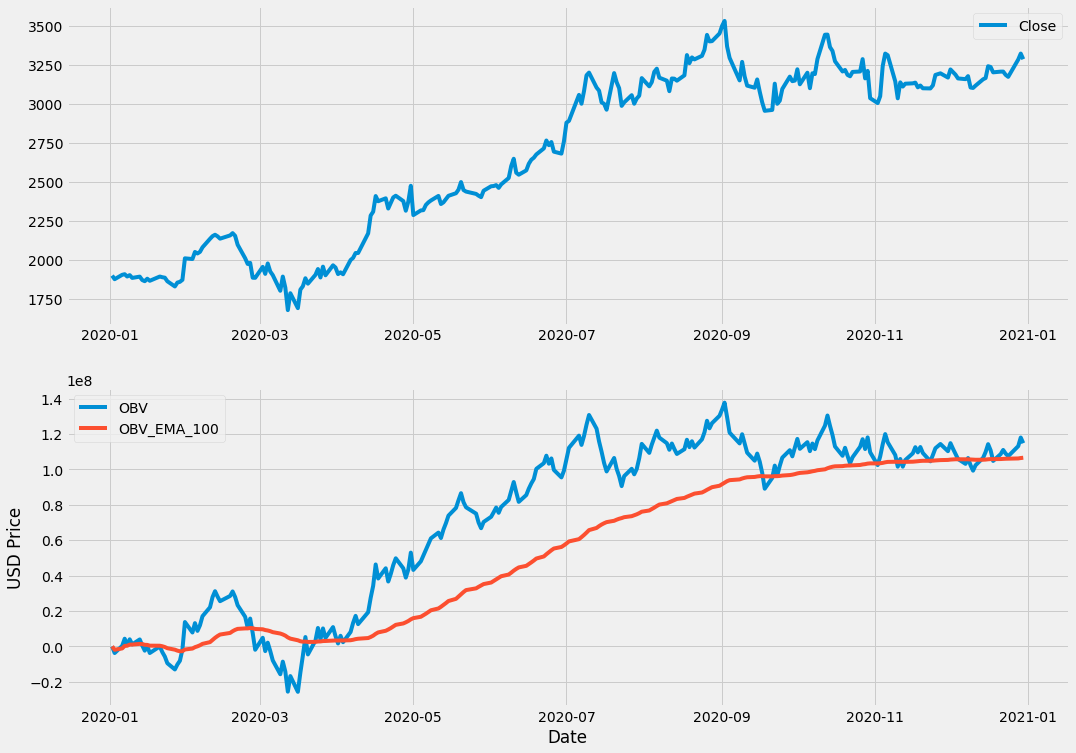

In [ ]:
df = OBV(df, span=100)

fig = plt.figure(figsize=(16, 12))
plt.subplot(2, 1, 1)
plt.plot(df['Close'], label='Close')
plt.legend()


plt.subplot(2, 1, 2)
plt.plot(df['OBV'], label='OBV')
plt.plot(df['OBV_EMA_100'], label='OBV_EMA_100')

plt.xlabel('Date')
plt.ylabel('USD Price')
plt.legend()

plt.show()

In [ ]:
def BollingerBand(df, span=20, price='Close'):
  """ Calculate and add Bollinger Band index to the dataframe
  Arguments:
    df: dataframe
    span: time period in day that is used to calculate SMA, STD
    price: name of price column
    volume: name of volume column
  """
  SMA_col_name = '{}_SMA'.format(span)
  STD_col_name = '{}_STD'.format(span)

  if SMA_col_name not in df.columns:
    # Get simple moving average
    df[SMA_col_name] = df[price].rolling(span).mean()
  if STD_col_name not in df.columns:
    # Get standard deviation
    df[STD_col_name] = df[price].rolling(span).std()
  
  # Calculate the upper Bollinger band
  df['{}_Bollinger_Upper'.format(span)] = df[SMA_col_name] + (df[STD_col_name] * 2)
  # Calculate the lower Bollinger band
  df['{}_Bollinger_Lower'.format(span)] = df[SMA_col_name] - (df[STD_col_name] * 2)

  return df

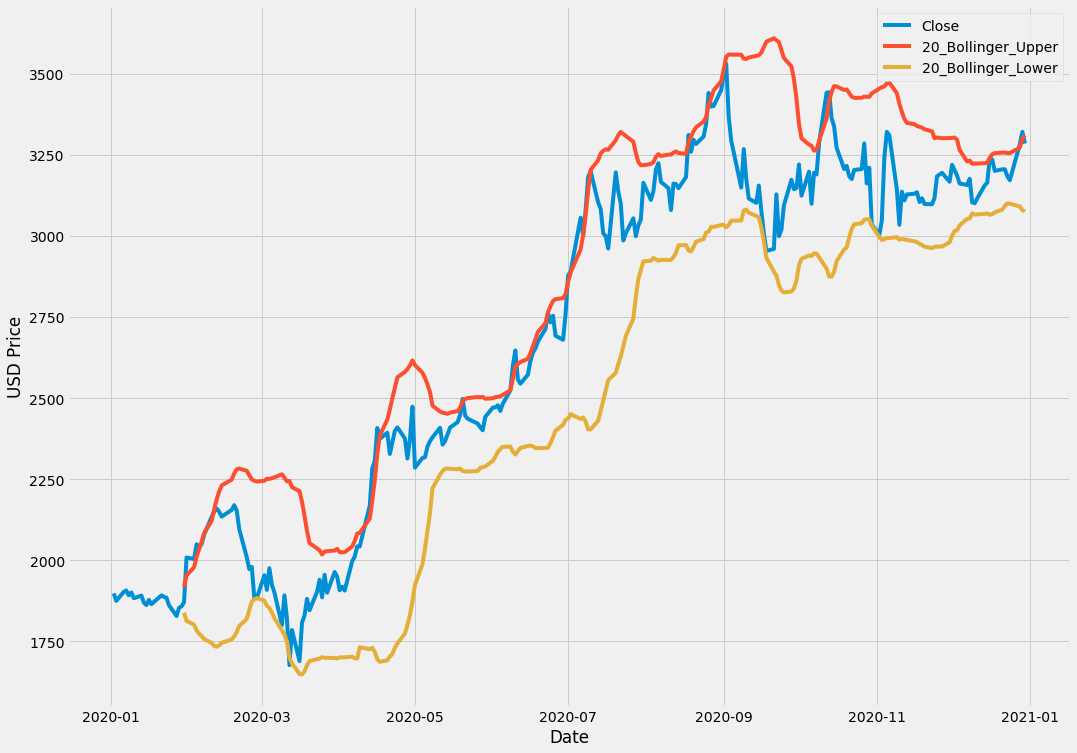

In [ ]:
df = BollingerBand(df, span=20)

fig = plt.figure(figsize=(16, 12))
plt.plot(df['Close'], label='Close')
plt.plot(df['20_Bollinger_Upper'], label='20_Bollinger_Upper')
plt.plot(df['20_Bollinger_Lower'], label='20_Bollinger_Lower')

plt.xlabel('Date')
plt.ylabel('USD Price')
plt.legend()

plt.show()

In [ ]:
def SMA(df, span=[21, 50], price='Close'):
  """ Calculate and add SMA index to the dataframe
  Arguments:
    df: dataframe
    span: list of span to calculate SMA
    price: price column name
  """

  for i in range(len(span)):
    s = span[i]
    df['{}_SMA'.format(s)] = df[price].rolling(s).mean()
  
  return df

In [ ]:
df = SMA(df, span=[21, 50])

In [ ]:
df

,High,Low,Open,Close,Volume,Adj Close,OBV,OBV_EMA_100,20_SMA,20_STD,20_Bollinger_Upper,20_Bollinger_Lower,21_SMA,50_SMA
Date,,,,,,,,,,,,,,
2020-01-02,1898.010010,1864.150024,1875.000000,1898.010010,4029000,1898.010010,0,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,1886.199951,1864.500000,1864.500000,1874.969971,3764400,1874.969971,-3764400,-1.901022e+06,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-06,1903.689941,1860.000000,1860.000000,1902.880005,4061800,1902.880005,297400,-1.153510e+06,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-07,1913.890015,1892.040039,1904.500000,1906.859985,4044900,1906.859985,4342300,2.619330e+05,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-08,1911.000000,1886.439941,1898.040039,1891.969971,3508000,1891.969971,834300,3.810306e+05,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-23,3210.129883,3184.169922,3205.000000,3185.270020,2093800,3185.270020,108925600,1.060408e+08,3178.876013,38.952694,3256.781401,3100.970625,3175.980015,3174.671392
2020-12-24,3202.000000,3169.000000,3193.899902,3172.689941,1451900,3172.689941,107473700,1.060694e+08,3178.257007,38.947450,3256.151906,3100.362108,3178.581438,3170.850991
2020-12-28,3304.000000,3172.689941,3194.000000,3283.959961,5686800,3283.959961,113160500,1.062108e+08,3182.688000,45.485557,3273.659114,3091.716887,3183.290481,3169.757192
